<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Logistic_Regression_with_Breast_Cancer_Dataset_Sklearn_Builtin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [3]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients (first 5):", model.coef_[0][:5])

Accuracy: 0.956140350877193
Coefficients (first 5): [ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532]


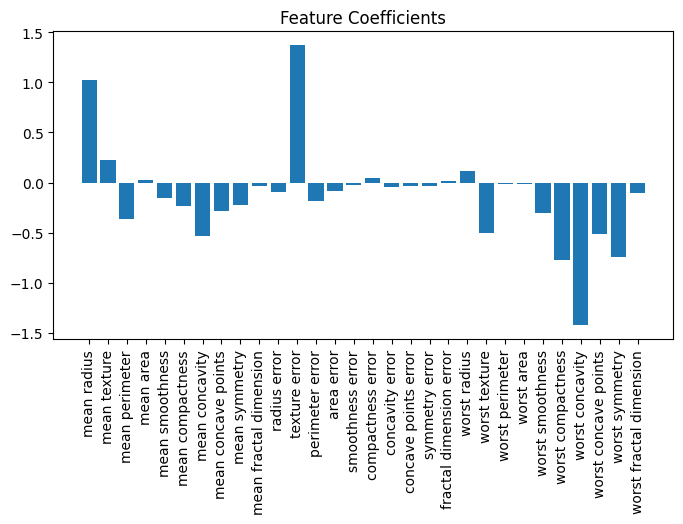

In [4]:
# Plot 1: Feature Coefficients
plt.figure(figsize=(8, 4))
plt.bar(range(len(model.coef_[0])), model.coef_[0])
plt.xticks(range(len(data.feature_names)), data.feature_names, rotation=90)
plt.title('Feature Coefficients')
plt.show()

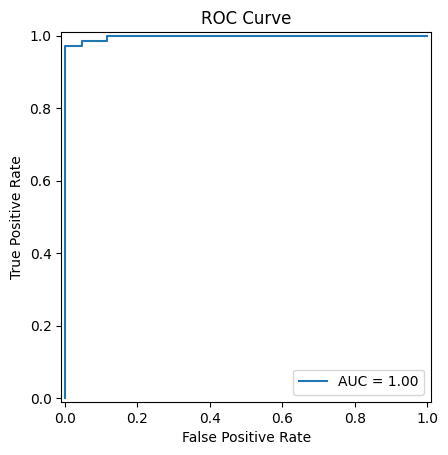

In [5]:
# Plot 2: ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_prob))
disp.plot()
plt.title('ROC Curve')
plt.show()